In [2]:
library(Seurat)
library(Signac)
library(glue)
library(reshape2)
library(dplyr)
library(ggplot2)
set.seed(1234)

setwd("~/projects/deepscore")
source("R/deepscore.R")
source("R/marker_analysis.R")

In [ ]:
install.packages("devtools")
devtools::install_github("rstudio/tensorflow")
devtools::install_github("rstudio/keras")

In [3]:
library(keras)
keras$"__version__"

Loaded Tensorflow version 2.6.0



[1] "2.6.0"

In [4]:
# If reading the data from an .rds objects:
kidney.rna <- readRDS("~/projects/kidney/Nuc/kidney.rna.rds")
kidney.atac.comb <- readRDS("~/projects/kidney/Atac/kidney.atac_combpeaks.rds")

kidney.multi.comb <- readRDS("~/projects/kidney/Multi/kidney.multi_combpeaks.rds")

In [5]:
DefaultAssay(kidney.atac.comb) <- "peaks"
kidney.atac.comb <- DietSeurat(kidney.atac.comb, 
                               assays = c("peaks", "RNA"), 
                               dimreducs = names(kidney.atac.comb@reductions), 
                               graphs = names(kidney.atac.comb@graphs))

DefaultAssay(kidney.multi.comb) <- "peaks"
kidney.multi.comb <- DietSeurat(kidney.multi.comb, 
                               assays = c("peaks", "RNA"), 
                               dimreducs = names(kidney.multi.comb@reductions), 
                               graphs = names(kidney.multi.comb@graphs))

In [6]:
kidney.atac.comb
kidney.multi.comb
kidney.rna

An object of class Seurat 
173743 features across 5638 samples within 2 assays 
Active assay: peaks (154136 features, 0 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: lsi, umap

An object of class Seurat 
190737 features across 3243 samples within 2 assays 
Active assay: peaks (154136 features, 0 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: lsi, umap

An object of class Seurat 
20967 features across 3760 samples within 1 assay 
Active assay: RNA (20967 features, 800 variable features)
 2 dimensional reductions calculated: pca, umap

# Using the multiome RNA and the gene activity inferred from ATAC

In [41]:
DefaultAssay(kidney.multi.comb) <- "RNA"
DefaultAssay(kidney.atac.comb) <- "RNA"

In [17]:
multi.rna.m <- FindAllMarkers(kidney.multi.comb, assay = "RNA", min.pct = 0.2, 
                                   logfc.threshold = 0.2, only.pos = T)
saveRDS(multi.rna.m, file = "data/multi.rna.m.rds")

Calculating cluster PT

Calculating cluster PT_VCAM1

Calculating cluster PEC

Calculating cluster TAL

Calculating cluster DCT1

Calculating cluster DCT2

Calculating cluster CNT

Calculating cluster PC

Calculating cluster ICA

Calculating cluster ICB

Calculating cluster PODO

Calculating cluster ENDO

Calculating cluster MES

Calculating cluster FIB

Calculating cluster LEUK



In [8]:
multi.rna.m <- readRDS("data/multi.rna.m.rds")
dim(multi.rna.m)

[1] 9495    7

In [9]:
top_markers(multi.rna.m)

$PT
 [1] "RNF212B" "CUBN"    "ACSM2B"  "SLC22A6" "SLC13A3" "PCDH15"  "PLG"    
 [8] "ACSM2A"  "AFM"     "ALDOB"  

$PT_VCAM1
 [1] "RHEX"   "UGT2A3" "CDH6"   "ALPK2"  "EPHA7"  "DLGAP1" "CDH2"   "HAVCR1"
 [9] "KCTD16" "PRUNE2"

$PEC
 [1] "SLC4A11"   "WSCD2"     "MGAT4C"    "CFH"       "COL11A1"   "LINC01435"
 [7] "OCA2"      "LINC01197" "TMEM130"   "EDIL3"    

$TAL
 [1] "SLC12A1"   "CASR"      "SIM2"      "ENOX1"     "LINC01606" "NPSR1-AS1"
 [7] "ACPP"      "UMOD"      "GPC5"      "ERBB4"    

$DCT1
 [1] "ADAMTS17"   "TMEM52B"    "SALL3"      "DNER"       "SLC43A1"   
 [6] "AC078980.1" "LINC01896"  "DEFB1"      "FMN1"       "CPXM2"     

$DCT2
 [1] "LINC01890"  "AC087341.1" "JMJD1C-AS1" "LINC02385"  "AC093072.1"
 [6] "HAS1"       "AP001468.1" "LPAR4"      "GABRG1"     "AC127520.1"

$CNT
 [1] "LINC01099"  "CALB1"      "LINC01098"  "SCN2A"      "AC019197.1"
 [6] "HSD11B2"    "RGS6"       "SLC8A1-AS1" "PCDH7"      "BARX2"     

$PC
 [1] "GATA3"    "AQP2"     "PIK3C2G"  "PWRN1"    "KSR2"     "PKIA"    
 [7] "PDE10A"   "SCNN1G"   "COL4A6"   "SLC38A11"

$ICA
 [1] "CLNK"      "NXPH2"     "LINC01187" "ATP6V1C2"  "DMRT2"     "TMEM101"  
 [7] "LY86-AS1"  "THRB-AS1"  "ATP6V0D2"  "KIT"      

$ICB
 [1] "SLC26A4"  "INSRR"    "SLC4A9"   "CSMD3"    "TLDC2"    "DNAH11"  
 [7] "HPSE"     "HEPACAM2" "KCNJ6"    "CDH12"   

$PODO
 [1] "PTPRQ"      "NTNG1"      "AC109466.1" "FMN2"       "NPHS2"     
 [6] "ADAMTS19"   "AC008415.1" "AC092813.2" "LINC02149"  "NPHS1"     

$ENDO
 [1] "EMCN"    "ADGRL4"  "TEK"     "PECAM1"  "PTPRB"   "LDB2"    "FLT1"   
 [8] "ERG"     "RAPGEF4" "NOTCH4" 

$MES
 [1] "AC114316.1" "WFDC1"      "ADCY3"      "PDGFRB"     "DAAM2"     
 [6] "CSPG4"      "AGTR1"      "AC073941.1" "PRR16"      "ABCC8"     

$FIB
 [1] "C7"        "PDGFRA"    "LINC00924" "ABCA8"     "FBLN5"     "COL6A3"   
 [7] "MOXD1"     "PID1"      "LAMA2"     "TRPC4"    

$LEUK
 [1] "IKZF1"    "ARHGAP15" "PTPRC"    "PIK3R5"   "IL7R"     "CXCR4"   
 [7] "PRKCB"    "CD53"     "CD247"    "ITK"

### Find common features between the two datasets and filter the others:

In [12]:
common_genes <- find_common_variable_genes(kidney.multi.comb, kidney.atac.comb, sample.assay="RNA")

Looking for 10000 HVG
Found 3262 genes in common
Looking for 11000 HVG
Found 3713 genes in common
Looking for 12000 HVG
Found 4073 genes in common


In [23]:
common_genes <- find_refmarkers_in_variable_genes(multi.rna.m, kidney.atac.comb, sample.assay="RNA")

Looking for 267 marker genes from each label
Found 732 genes in common
Looking for 367 marker genes from each label
Found 913 genes in common
Looking for 467 marker genes from each label
Found 1053 genes in common
Looking for 567 marker genes from each label
Found 1214 genes in common
Looking for 667 marker genes from each label
Found 1410 genes in common
Looking for 767 marker genes from each label
Found 1616 genes in common
Looking for 867 marker genes from each label
Found 1763 genes in common
Looking for 967 marker genes from each label
Found 1917 genes in common
Looking for 1067 marker genes from each label
Found 2064 genes in common


In [13]:
common_genes <- find_refmarkers_in_genes(multi.rna.m, kidney.atac.comb, sample.assay="RNA")

Looking for 133 marker genes from each label
Found 1339 genes in common
Looking for 233 marker genes from each label
Found 2101 genes in common


### Prepare the reference data and train model:

In [42]:
ds <- DeepScore(
        hidden_nodes=c(512, 64), 
        common_features=common_genes, 
        n_labels=16, 
        epochs=10, 
        batch_size=32, 
        activation="relu", 
        dropout=TRUE, 
        dropout_rate=0.25, 
        batchnorm=TRUE, 
        lr=0.001,
        weight_reg=TRUE
)

ds <- ds %>% set_reference(kidney.multi.comb, kidney.multi.comb$annotation, assay="RNA")

[1] "Model evaluation on unseen data:"
     loss  accuracy 
0.3106949 0.9051988 


`geom_smooth()` using formula 'y ~ x'



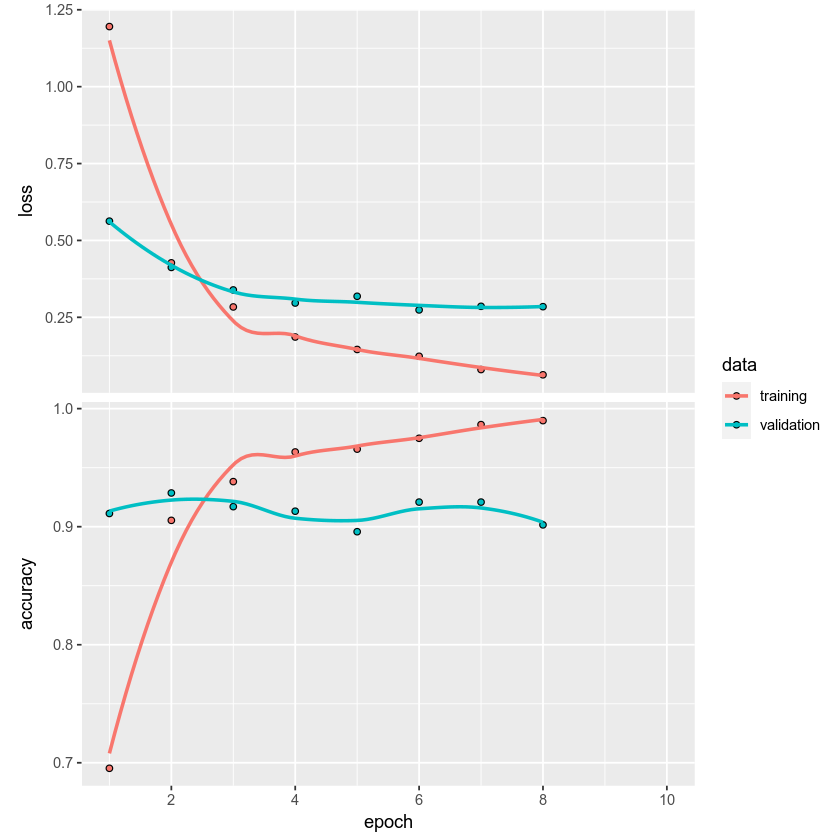

In [32]:
ds <- ds %>% train()

In [33]:
save_model_hdf5(ds$model, filepath = "data/kidney_rna_model.hdf5")

### Predict the celltypes in our sample using the trained model:

In [43]:
ds$model <- load_model_hdf5(filepath="data/kidney_rna_model.hdf5")

kidney.atac.comb <- annotate(ds, query = kidney.atac.comb, assay = "RNA")
table(kidney.atac.comb$ds_prediction)


         CNT         DCT1         ENDO          FIB          ICA          ICB 
           6            2          604          178           39            2 
        LEUK          MES           PC          PEC         PODO           PT 
         289          148           63           24           31            1 
    PT_VCAM1          TAL unclassified 
          10           14         4227 

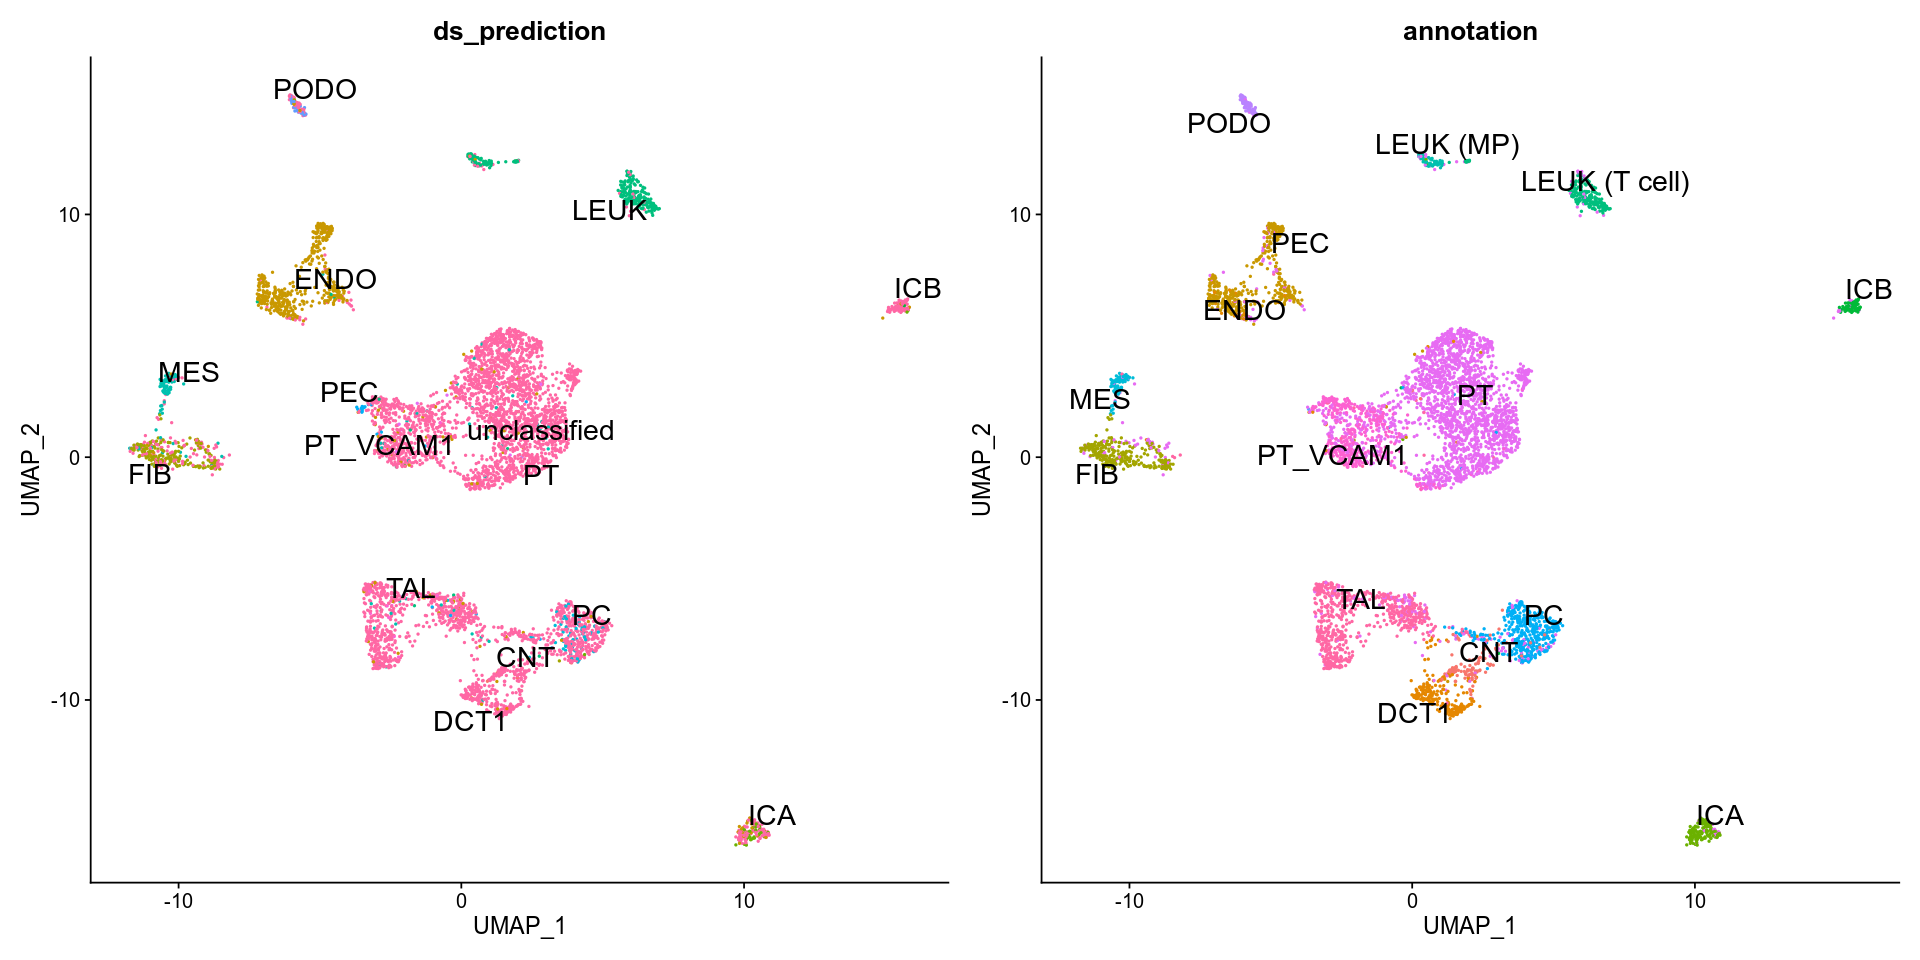

In [44]:
options(repr.plot.width=16, repr.plot.height=8)

p1 <- DimPlot(kidney.atac.comb, group.by = "ds_prediction", label = TRUE,
        label.size = 6, repel = TRUE) + NoLegend()
p2 <- DimPlot(kidney.atac.comb, group.by = 'annotation', label = TRUE,
        label.size = 6, repel = TRUE) + NoLegend()

p1 + p2

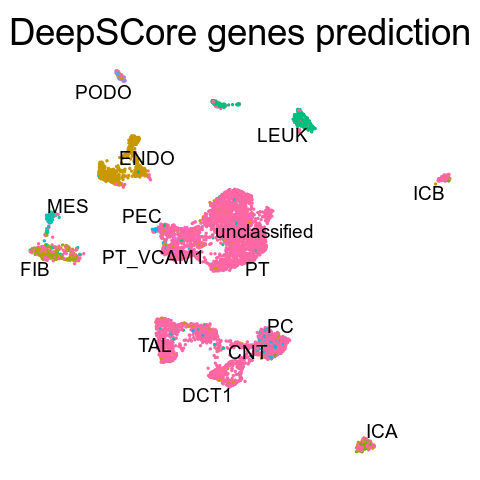

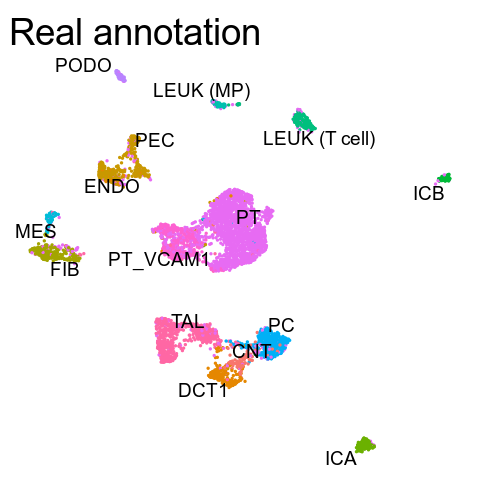

In [45]:
options(repr.plot.width=4, repr.plot.height=4)

DimPlot(kidney.atac.comb, group.by = "ds_prediction", label = TRUE,
        repel = TRUE) + theme_void() + NoLegend() + 
        theme(plot.title = element_text(size=22)) + ggtitle("DeepSCore genes prediction")
DimPlot(kidney.atac.comb, group.by = 'annotation', label = TRUE,
        repel = TRUE) + theme_void() + NoLegend() + 
        theme(plot.title = element_text(size=22)) + ggtitle("Real annotation")

In [47]:
Idents(kidney.atac.comb) <- "ds_prediction"
atac.pred.rna.m <- FindAllMarkers(kidney.atac.comb, assay = "RNA", min.pct = 0.2, 
                                   logfc.threshold = 0.2, only.pos = T)
saveRDS(atac.pred.rna.m, file = "data/atac.pred.rna.m.rds")

In [20]:
atac.pred.rna.m <- readRDS("data/atac.pred.rna.m.rds")

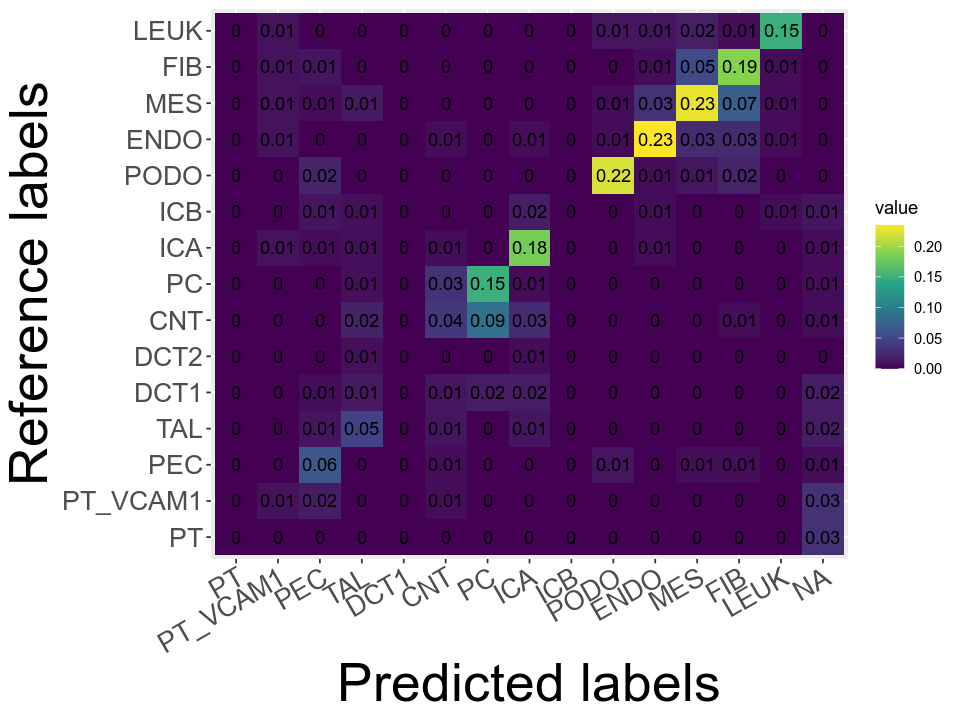

In [25]:
ref <- top_markers(multi.rna.m, ntop = 100)
q <- top_markers(atac.pred.rna.m, ntop = 100)

options(repr.plot.width=8, repr.plot.height=6)
ms <- matchSCore2(ref, q)
ms$gg + theme(axis.title = element_text(size=32))

In [26]:
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,6336514,338.5,11262328,601.5,11262328,601.5
Vcells,366869191,2799.0,586392405,4473.9,521499413,3978.8


# Using the multiome peaks and the ATAC peaks

In [27]:
DefaultAssay(kidney.multi.comb) <- "peaks"
DefaultAssay(kidney.atac.comb) <- "peaks"

In [60]:
library(future)
plan(multisession)

# This is done right now with Wilcoxon test but it's better to use Logistic Regression
# with technical variables to account for
multi.peaks.m <- FindAllMarkers(kidney.multi.comb, assay = "peaks", min.pct = 0.1, 
                                   logfc.threshold = 0.2, only.pos = T)
saveRDS(multi.peaks.m, file = "data/multi.peaks.m.rds")


Attaching package: ‘future’


The following object is masked from ‘package:keras’:

    %<-%


The following object is masked from ‘package:GenomicRanges’:

    values


The following object is masked from ‘package:S4Vectors’:

    values


Calculating cluster PT

Calculating cluster PT_VCAM1

Calculating cluster PEC

Calculating cluster TAL

Calculating cluster DCT1

Calculating cluster DCT2

Calculating cluster CNT

Calculating cluster PC

Calculating cluster ICA

Calculating cluster ICB

Calculating cluster PODO

Calculating cluster ENDO

Calculating cluster MES

Calculating cluster FIB

Calculating cluster LEUK



In [28]:
multi.peaks.m <- readRDS("data/multi.peaks.m.rds")
dim(multi.peaks.m)

[1] 8770    7

In [29]:
top_markers(multi.peaks.m, ntop = 4)

$PT
[1] "chr5-151027778-151030481"  "chr10-86163190-86164729"  
[3] "chr10-5573385-5575081"     "chr10-106957942-106959225"

$PT_VCAM1
[1] "chr17-40509859-40510592"  "chr3-11136792-11137753"  
[3] "chr11-70247378-70248032"  "chr2-104789990-104790593"

$PEC
[1] "chr10-124063759-124064041" "chr12-1518983-1519472"    
[3] "chr22-27667122-27667480"   "chr6-111950610-111951164" 

$TAL
[1] "chr5-4480558-4481455"     "chr14-25833173-25834045" 
[3] "chr7-15167779-15168663"   "chr5-172700305-172701214"

$DCT1
[1] "chr7-70859290-70859685"  "chr16-85515996-85516320"
[3] "chr17-36823798-36824222" "chr18-51446954-51447859"

$DCT2
[1] "chr9-5427715-5428006"    "chr8-49047334-49047674" 
[3] "chr14-31508229-31508453" "chr10-5779733-5779933"  

$CNT
[1] "chr17-41529979-41530494"  "chr3-128435024-128435426"
[3] "chr19-22532158-22533261"  "chr20-768353-769070"     

$PC
[1] "chr12-49950288-49950872" "chr19-22325647-22326483"
[3] "chr17-10791917-10792503" "chr15-95923508-95924180"

$ICA
[1] "chr5-53891125-53891672"  "chr5-6527773-6528332"   
[3] "chr4-54472738-54473530"  "chr17-39236768-39237254"

$ICB
[1] "chr2-36121747-36122031"   "chr4-47471587-47471952"  
[3] "chr1-236480612-236481394" "chr2-217047175-217047861"

$PODO
[1] "chr10-112457791-112458149" "chr20-40446819-40447503"  
[3] "chr11-84825228-84825608"   "chr16-66247791-66248495"  

$ENDO
[1] "chr9-121325792-121326770" "chr18-7370542-7371204"   
[3] "chr16-16120117-16121206"  "chr16-66364314-66364969" 

$MES
[1] "chr10-9157613-9157942"   "chr12-58413789-58414192"
[3] "chr20-58199099-58199812" "chr16-80900189-80900828"

$FIB
[1] "chr15-39472613-39473568"   "chr1-236018849-236019554" 
[3] "chr12-115823543-115824256" "chr2-241899317-241899735" 

$LEUK
[1] "chr12-92593742-92594357"  "chr2-233331326-233331960"
[3] "chr11-14554870-14555252"  "chr1-159067812-159068541"

### Find common features between the two datasets and filter the others:

In [112]:
common_peaks <- find_common_top_peaks(kidney.multi.comb, kidney.atac.comb, target_n_peaks = 10000)

Looking for 10000 top peaks


Selecting by percentile

Selecting by percentile



Found 9069 top peaks in common
Looking for 11000 top peaks


Selecting by percentile

Selecting by percentile



Found 10022 top peaks in common


In [95]:
common_peaks <- find_refmarkers_in_top_peaks(multi.peaks.m, kidney.atac.comb)

Looking for 6000 marker peaks from each label


Selecting by percentile



Found 1087 peaks in common
Looking for 9000 marker peaks from each label


Selecting by percentile



Found 1696 peaks in common
Looking for 12000 marker peaks from each label


Selecting by percentile



Found 2370 peaks in common
Looking for 15000 marker peaks from each label


Selecting by percentile



Found 2988 peaks in common
Looking for 18000 marker peaks from each label


Selecting by percentile



Found 3335 peaks in common
Looking for 21000 marker peaks from each label


Selecting by percentile



Found 3558 peaks in common
Looking for 24000 marker peaks from each label


Selecting by percentile



Found 3692 peaks in common
Looking for 27000 marker peaks from each label


Selecting by percentile



Found 3798 peaks in common
Looking for 30000 marker peaks from each label


Selecting by percentile



Found 3887 peaks in common
Looking for 33000 marker peaks from each label


Selecting by percentile



Found 3984 peaks in common
Looking for 36000 marker peaks from each label


Selecting by percentile



Found 4076 peaks in common
Looking for 39000 marker peaks from each label


Selecting by percentile



Found 4163 peaks in common
Looking for 42000 marker peaks from each label


Selecting by percentile



Found 4242 peaks in common
Looking for 45000 marker peaks from each label


Selecting by percentile



Found 4361 peaks in common
Looking for 48000 marker peaks from each label


Selecting by percentile



Found 4515 peaks in common
Looking for 51000 marker peaks from each label


Selecting by percentile



Found 4647 peaks in common
Looking for 54000 marker peaks from each label


Selecting by percentile



Found 4778 peaks in common
Looking for 57000 marker peaks from each label


Selecting by percentile



Found 4970 peaks in common
Looking for 60000 marker peaks from each label


Selecting by percentile



Found 5134 peaks in common
Looking for 63000 marker peaks from each label


Selecting by percentile



Found 5315 peaks in common
Looking for 66000 marker peaks from each label


Selecting by percentile



Found 5497 peaks in common
Looking for 69000 marker peaks from each label


Selecting by percentile



Found 5706 peaks in common
Looking for 72000 marker peaks from each label


Selecting by percentile



Found 5892 peaks in common
Looking for 75000 marker peaks from each label


Selecting by percentile



Found 6071 peaks in common


In [30]:
common_peaks <- find_refmarkers_in_peaks(multi.peaks.m, kidney.atac.comb, target_n_peaks = 10000)

Looking for 667 marker peaks from each label
Found 3367 peaks in common
Looking for 767 marker peaks from each label
Found 3566 peaks in common
Looking for 867 marker peaks from each label
Found 3766 peaks in common
Looking for 967 marker peaks from each label
Found 3964 peaks in common
Looking for 1067 marker peaks from each label
Found 4163 peaks in common
Looking for 1167 marker peaks from each label
Found 4362 peaks in common
Looking for 1267 marker peaks from each label
Found 4561 peaks in common
Looking for 1367 marker peaks from each label
Found 4758 peaks in common
Looking for 1467 marker peaks from each label
Found 4956 peaks in common
Looking for 1567 marker peaks from each label
Found 5155 peaks in common
Looking for 1667 marker peaks from each label
Found 5353 peaks in common
Looking for 1767 marker peaks from each label
Found 5551 peaks in common
Looking for 1867 marker peaks from each label
Found 5747 peaks in common
Looking for 1967 marker peaks from each label
Found 594

### Prepare the reference data and train model:

In [31]:
ds <- DeepScore(
        hidden_nodes=c(1024, 512, 128, 64), 
        common_features=common_peaks, 
        n_labels=16, 
        epochs=30, 
        batch_size=32, 
        activation="relu", 
        dropout=TRUE, 
        dropout_rate=0.5, 
        batchnorm=TRUE, 
        lr=0.001,
        weight_reg=TRUE
)

ds <- ds %>% set_reference(kidney.multi.comb, kidney.multi.comb$annotation, assay="peaks")

[1] "Model evaluation on unseen data:"
     loss  accuracy 
0.9195164 0.7737003 


`geom_smooth()` using formula 'y ~ x'



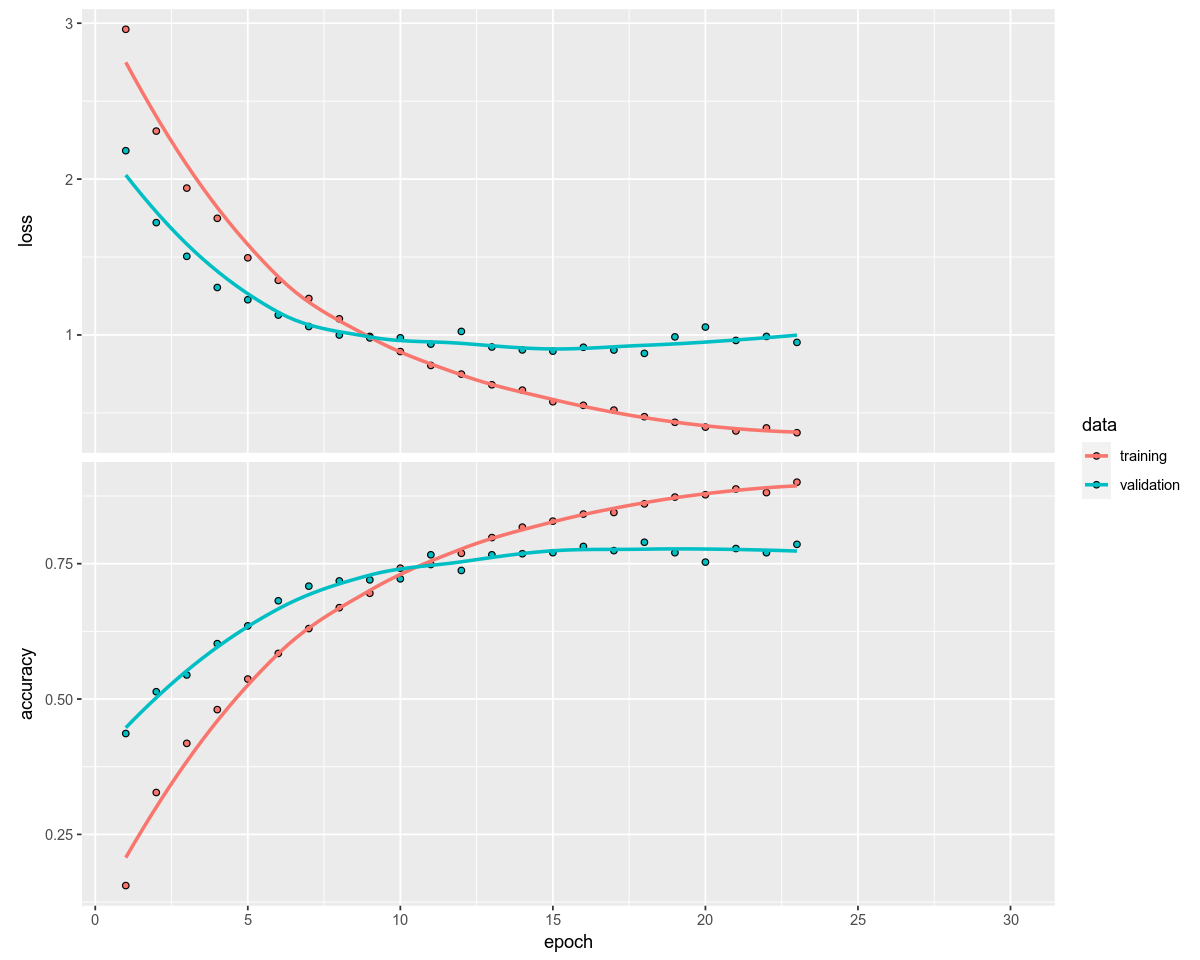

In [122]:
ds <- ds %>% train(patience=5)

In [123]:
save_model_hdf5(ds$model, filepath = "data/kidney_peaks_model.hdf5")

### Predict the celltypes in our sample using the trained model:

In [32]:
ds$model <- load_model_hdf5(filepath="data/kidney_peaks_model.hdf5")

kidney.atac.comb <- annotate(ds, query = kidney.atac.comb, assay = "peaks")
table(kidney.atac.comb$ds_prediction)


         CNT         DCT1         ENDO          FIB          ICA         LEUK 
         125          181          489          313          228          264 
         MES           PC         PODO           PT     PT_VCAM1          TAL 
          26          429           90         1887          574          740 
unclassified 
         292 

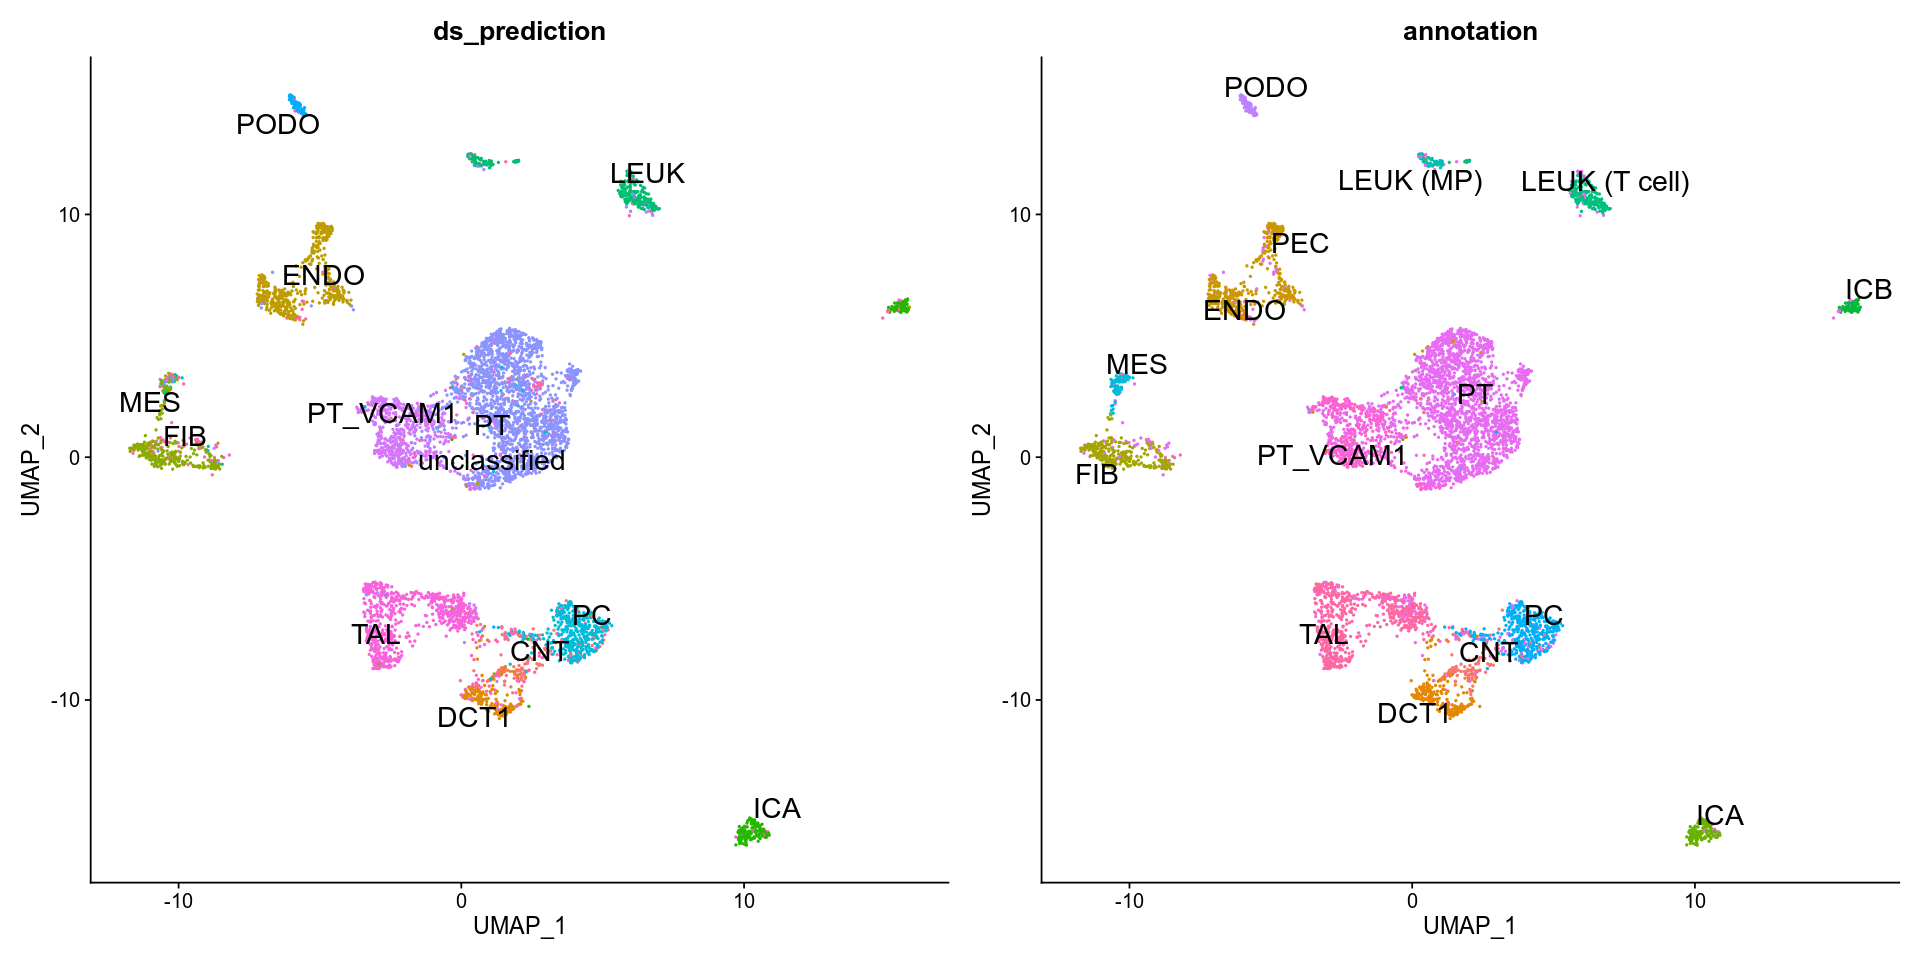

In [33]:
options(repr.plot.width=16, repr.plot.height=8)

p1 <- DimPlot(kidney.atac.comb, group.by = "ds_prediction", label = TRUE,
        label.size = 6, repel = TRUE) + NoLegend()
p2 <- DimPlot(kidney.atac.comb, group.by = 'annotation', label = TRUE,
        label.size = 6, repel = TRUE) + NoLegend()

p1 + p2

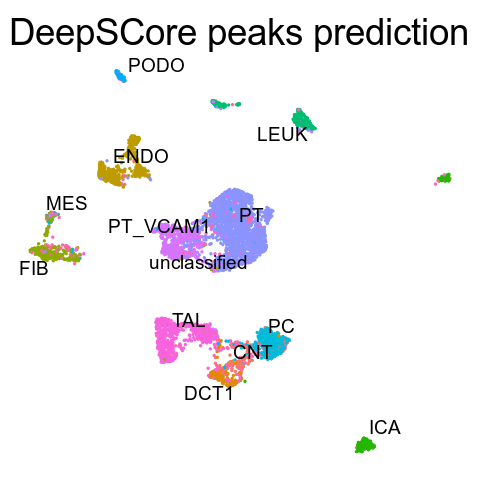

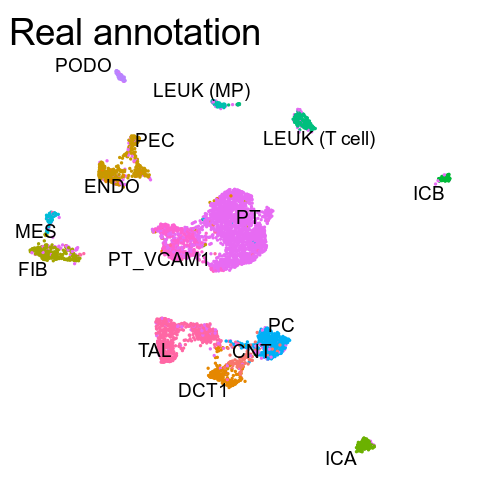

In [39]:
options(repr.plot.width=4, repr.plot.height=4)

DimPlot(kidney.atac.comb, group.by = "ds_prediction", label = TRUE,
        repel = TRUE) + theme_void() + NoLegend() + 
        theme(plot.title = element_text(size=22)) + ggtitle("DeepSCore peaks prediction")
DimPlot(kidney.atac.comb, group.by = 'annotation', label = TRUE,
        repel = TRUE) + theme_void() + NoLegend() + 
        theme(plot.title = element_text(size=22)) + ggtitle("Real annotation")

In [126]:
Idents(kidney.atac.comb) <- "ds_prediction"
atac.pred.peaks.m <- FindAllMarkers(kidney.atac.comb, assay = "peaks", min.pct = 0.1, 
                                   logfc.threshold = 0.2, only.pos = T)
saveRDS(atac.pred.peaks.m, file = "data/atac.pred.peaks.m.rds")

Calculating cluster CNT

Calculating cluster DCT1

Calculating cluster ENDO

Calculating cluster FIB

Calculating cluster ICA

Calculating cluster LEUK

Calculating cluster MES

Calculating cluster PC

Calculating cluster PODO

Calculating cluster PT

Calculating cluster PT_VCAM1

Calculating cluster TAL

Calculating cluster unclassified

Warning message in FindMarkers.default(object = data.use, slot = data.slot, counts = counts, :
“No features pass logfc.threshold threshold; returning empty data.frame”


In [35]:
atac.pred.peaks.m <- readRDS("data/atac.pred.peaks.m.rds")

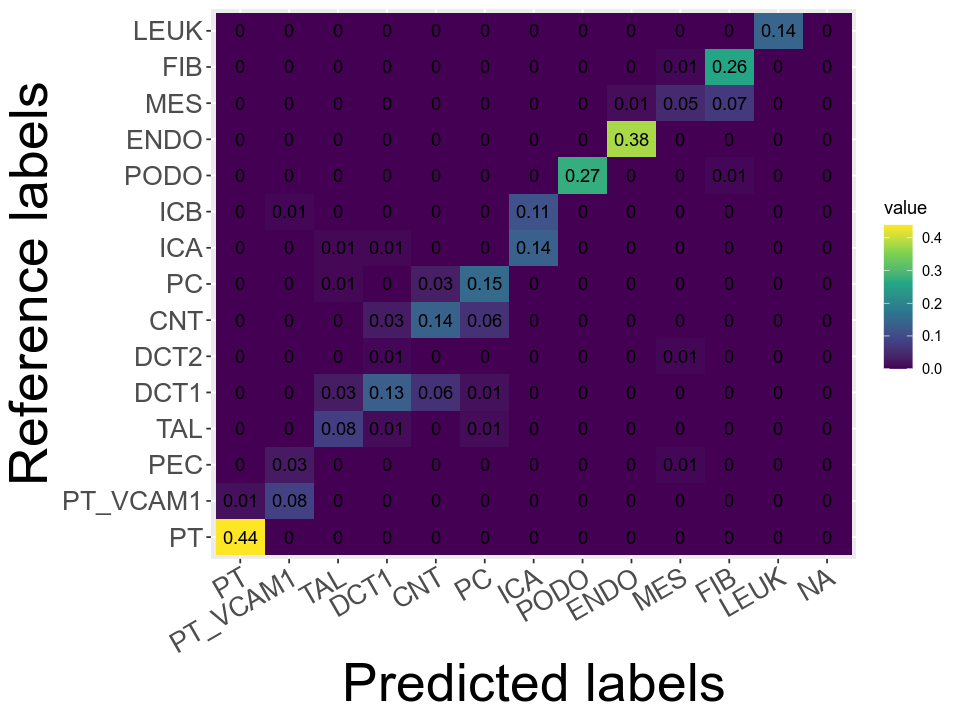

In [37]:
ref <- top_markers(multi.peaks.m, ntop = 100)
q <- top_markers(atac.pred.peaks.m, ntop = 100)

options(repr.plot.width=8, repr.plot.height=6)
ms <- matchSCore2(ref, q)
ms$gg + theme(axis.title = element_text(size=32))

In [138]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.3 LTS

Matrix products: default
BLAS/LAPACK: /home/pab/miniconda3/envs/csg.r/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=es_ES.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=es_ES.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=es_ES.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=es_ES.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] dplyr_1.0.7          future_1.24.0        ggplot2_3.3.5       
 [4] reshape2_1.4.4       keras_2.8.0.9000     GenomicRanges_1.46.1
 [7] GenomeInfoDb_1.30.0  IRanges_2.28.0       S4Vectors_0.32.3    
[10] BiocGenerics_0.40.0  glue_1.6.2           Signac_1.6.0        
[13] SeuratObject_4.0.